## Assignment 2 - Sample answer

This notebook provides a sample answer for one of the questions in [Assignment 2](https://github.com/thmosqueiro/graph-attention-net-genomics-public/blob/main/notebooks/Implementing%20a%20Graph%20Convolutional%20Network%20(GCN).ipynb). Please, use this resource as inspiration for your homework for what we would consider a great answer.

Let's start with the original code from the assignment:

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv

# Load the Cora dataset
dataset = Planetoid(root='data/Cora', name='Cora')

# Prepare data
data = dataset[0]

# Define a 2-layer GCN
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return torch.log_softmax(x, dim=1)

# Initialize model, optimizer, and loss function
model = GCN(input_dim=dataset.num_node_features, hidden_dim=16, output_dim=dataset.num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Training complete!")


Processing...
Done!


Epoch 0, Loss: 1.9476836919784546
Epoch 10, Loss: 0.6237938404083252
Epoch 20, Loss: 0.1160743460059166
Epoch 30, Loss: 0.023977885022759438
Epoch 40, Loss: 0.008353382349014282
Epoch 50, Loss: 0.004538132809102535
Epoch 60, Loss: 0.0031943076755851507
Epoch 70, Loss: 0.002553723519667983
Epoch 80, Loss: 0.0021698290947824717
Epoch 90, Loss: 0.0019009907264262438
Training complete!


## Sample answer to **Question 2**

> What would happen if we used a larger hidden dimension (e.g., 64 instead of 16)? How would this impact the model's capacity?

My intuition is that the computation would be slower, however the loss would reduce numerically up until it converges to a minimum beyond which no matter how much the hidden dimension scales, the loss remains the same. To test this hypothesis that the performance would improve, I can simply modify the parameter `hidden_dim`. However, to see if the performance converges after a while, I'd like to run the training procedure for various sizes of the hidden layer.

Here is what I'll try doing:
1. Modify the original code so that I can change the dimension of the hidden layer from the original value of 16, to a different value.
2. I will store results into a Python dictionary so that I can evaluate how performance changed as a function of the hidden layer size.
3. Finally, I will plot the results to understand if my original hypothesis of convergence is correct.

Because most often effects related to size occur in an exponential scale (doubling isn't going to provide too much change), let's scale the hidden layer size with a power. In other words, I will perform a for-loop for variable $n$ to calculate
$$\text{hidden layer dim} \,\, = \,\, 16^{n} \, ,$$
such that when $n=0$, then I have the original value 16. When $n=1.5$, I will have the required value in the question ($16^{1.5} = 64$). When $n=2.5$ I'd be reaching sizes for a hidden layer of $1024$, which is far beyond what was asked. Let's see what happens:

In [72]:
result = {}

# Copy from the original code to remove the extra layer from previous question
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return torch.log_softmax(x, dim=1)

for hidden_dim_power in [1, 1.2, 1.5, 2, 2.5]:
    dim = int(16**hidden_dim_power)
    print(f"--- Computing with hidden dim of {dim}")

    # Everything below until line 38 is a copy-paste from Utkrisht's original code...
    model = GCN(input_dim=dataset.num_node_features, hidden_dim=dim, output_dim=dataset.num_classes)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(100):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        out = model(data)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    # Storing the final performance value for a particular hidden layer size
    result[dim] = loss.item()

# Printing all results at once
print(result)

--- Computing with hidden dim of 16
Epoch 0, Loss: 1.9525809288024902
Epoch 10, Loss: 0.6009169220924377
Epoch 20, Loss: 0.09293711185455322
Epoch 30, Loss: 0.019414540380239487
Epoch 40, Loss: 0.007339568808674812
Epoch 50, Loss: 0.004177790600806475
Epoch 60, Loss: 0.0030024980660527945
Epoch 70, Loss: 0.0024295407347381115
Epoch 80, Loss: 0.0020796568132936954
Epoch 90, Loss: 0.0018299933290109038
--- Computing with hidden dim of 27
Epoch 0, Loss: 1.9570789337158203
Epoch 10, Loss: 0.2945689857006073
Epoch 20, Loss: 0.0254757571965456
Epoch 30, Loss: 0.005110494792461395
Epoch 40, Loss: 0.0021636374294757843
Epoch 50, Loss: 0.0013765355106443167
Epoch 60, Loss: 0.0010750986402854323
Epoch 70, Loss: 0.0009206339600495994
Epoch 80, Loss: 0.0008215434500016272
Epoch 90, Loss: 0.0007474513258785009
--- Computing with hidden dim of 64
Epoch 0, Loss: 1.9393079280853271
Epoch 10, Loss: 0.07027234882116318
Epoch 20, Loss: 0.002664875239133835
Epoch 30, Loss: 0.00048277669702656567
Epoch 40,

Notes:
* I can immediately see that the dictionary `results` shows a reduction in the loss as the hidden layer size increases.
* I also noticed that the drop in loss when the hidden layer size goes from 16 to 64 is a difference of 2 orders of magnitude (from $10^{-3}$ to $10^{-5}$. Similarly, the change in loss when it goes from 256 to 1024 is also of two orders of magnitude). This validates the point of modifying the hidden layer size exponentially, as opposed to linearly.
* Finally, as I executed the notebook cell above, I could observe a slowdown in compute time (it took a lot longer to run with larger layers than with smaller layers).

Next, I will plot the results so I can better visualize how the loss is changing.

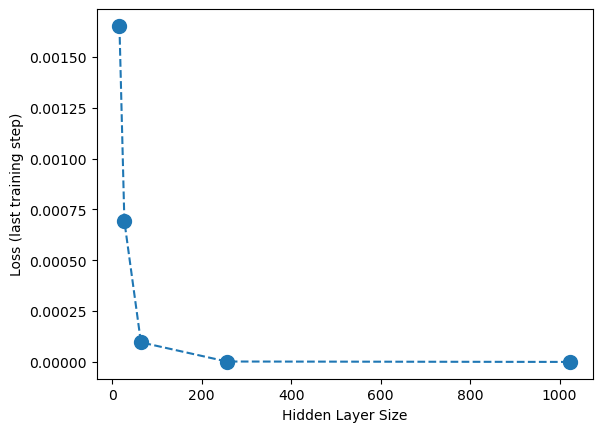

In [89]:
pl.plot(result.keys(), [result[x] for x in result.keys()], '--o', markersize=10)
pl.xlabel("Hidden Layer Size")
pl.ylabel("Loss (last training step)")
pl.show()

The convergence is happening as predicted. Beyond the dimension of 200-ish, I'm not seeing a lot of improvement from adding more nodes to my hidden layer (aka elbow method). The x-axis is moving too far, which is a great opportunity to plot log-x vs y

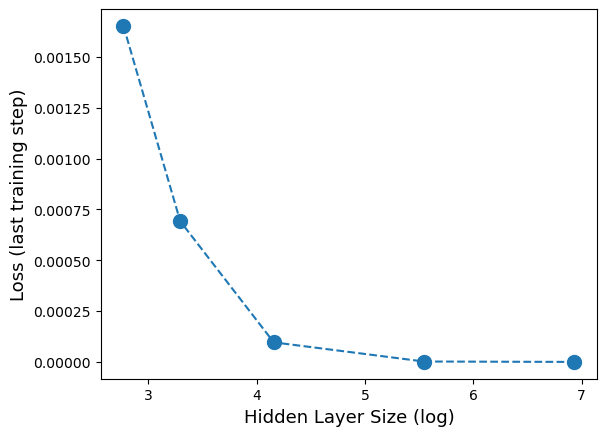

In [90]:
pl.plot(np.log(list(result.keys())), [result[x] for x in result.keys()], '--o', markersize=10)
pl.ylabel("Loss (last training step)", fontsize=13)
pl.xlabel("Hidden Layer Size (log)", fontsize=13)
pl.show()

Based on these observations, I'd probably recommend a hidden layer size of ~256 sothat I don't suffer too much in compute performance, yet I can achieve good performance in terms of my loss function.